### this notebook performs a kernel ridge regression with 10-fold nested cross validation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_features = pd.read_csv('BASC_Features_GMDerivatives.csv')
df_age = pd.read_csv('/home/angela/Desktop/pac2019/PAC2019_BrainAge_Training.csv')

In [3]:
random_state = 1

In [4]:
# set the x
x_ = df_features.loc[:,'scale007_1'::].values
# set the y
y_ = df_age.loc[:,'age'].values

In [5]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

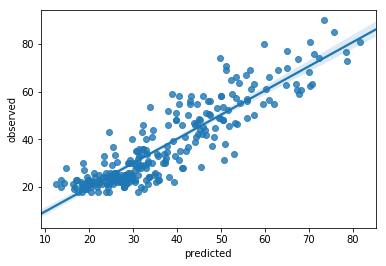

ACCURACY: rho = 0.8646347151241309, mae = 5.8724241722413515


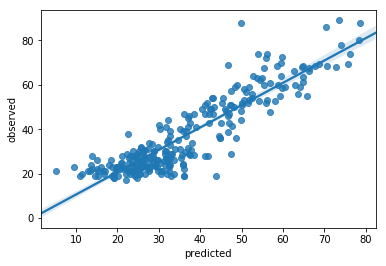

ACCURACY: rho = 0.8500505736575856, mae = 5.880571842974884


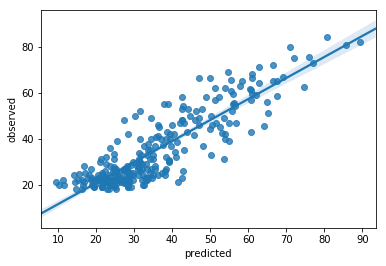

ACCURACY: rho = 0.8249861117364957, mae = 6.021228721987867


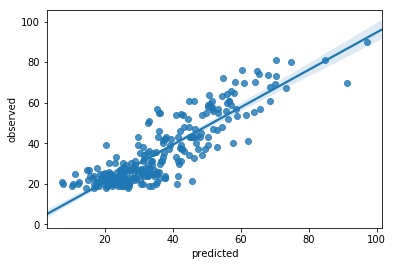

ACCURACY: rho = 0.814950002722554, mae = 6.389492089099292


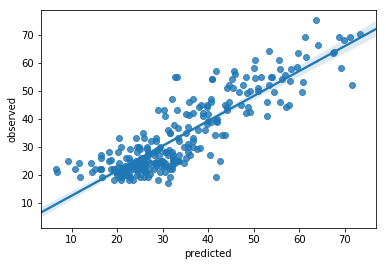

ACCURACY: rho = 0.8163875722278269, mae = 5.3388513949848395


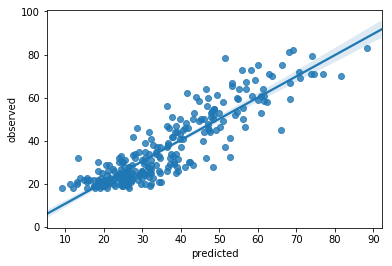

ACCURACY: rho = 0.8646118332314077, mae = 5.887926603097042


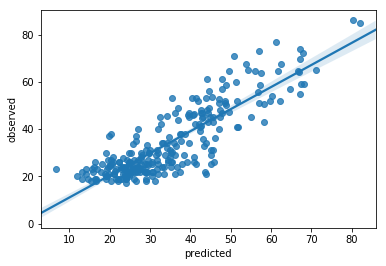

ACCURACY: rho = 0.8021475713055168, mae = 6.1033936251251895


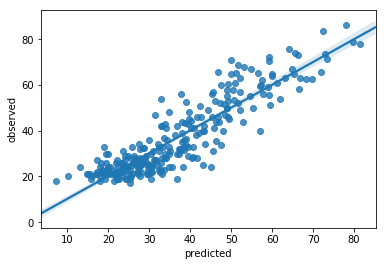

ACCURACY: rho = 0.8665784064102925, mae = 5.637255776577039


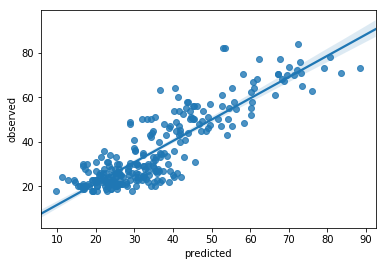

ACCURACY: rho = 0.8052464059374573, mae = 6.362631601467759


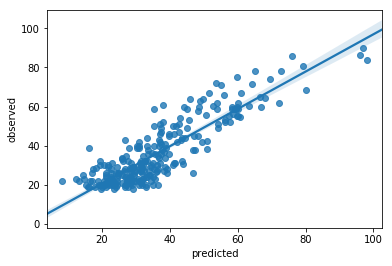

ACCURACY: rho = 0.7989288485318934, mae = 6.307749171513959


In [6]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [7]:
# note this r2 is the coefficient of determination
r2_list

[0.7995497174647421,
 0.8071702073458081,
 0.7654576894008946,
 0.7574516277057816,
 0.7465260269578734,
 0.7951694514489478,
 0.7335489361228789,
 0.8043990586458004,
 0.7608549172247354,
 0.7669484120591636]

In [8]:
np.mean(r2_list)

0.7737076044376626

In [9]:
mae_list

[5.8724241722413515,
 5.880571842974884,
 6.021228721987867,
 6.389492089099292,
 5.3388513949848395,
 5.887926603097042,
 6.1033936251251895,
 5.637255776577039,
 6.362631601467759,
 6.307749171513959]

In [10]:
np.mean(mae_list)

5.980152499906923

In [11]:
rho_list

[0.8646347151241309,
 0.8500505736575856,
 0.8249861117364957,
 0.814950002722554,
 0.8163875722278269,
 0.8646118332314077,
 0.8021475713055168,
 0.8665784064102925,
 0.8052464059374573,
 0.7989288485318934]

In [12]:
np.mean(rho_list)

0.830852204088516

In [13]:
param_list

[{'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'},
 {'alpha': 0.0001, 'kernel': 'rbf'}]